In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

In [ ]:
shutil.copy('/content/drive/MyDrive/Comvis 20211/primus.tgz', '/content/') 
shutil.copytree('/content/drive/MyDrive/Comvis 20211/end_to_end/Data', '/content/Data') 
shutil.copytree('/content/drive/MyDrive/Comvis 20211/end_to_end/trained_model', '/content/trained_model') 

'/content/trained_model'

# Load Primus dataset and filter redundant files 

In [ ]:
!mkdir /content/primus
!tar -xvf "/content/primus.tgz" -C "/content/primus/"

Streaming output truncated to the last 5000 lines.
./package_ab/201008631-1_1_2/201008631-1_1_2.agnostic
./package_ab/201008631-1_1_2/201008631-1_1_2.semantic
./package_ab/201008631-1_1_2/._201008631-1_1_2.mei
./package_ab/201008631-1_1_2/201008631-1_1_2.mei
./package_ab/201008631-1_1_2/._201008631-1_1_2.mid
./package_ab/201008631-1_1_2/201008631-1_1_2.mid
./package_ab/201008631-1_1_2/._201008631-1_1_2.png
./package_ab/201008631-1_1_2/201008631-1_1_2.png
./package_ab/201008631-1_1_2/._regular_pae.pae
./package_ab/201008631-1_1_2/regular_pae.pae
./package_ab/150205116-1_1_1/150205116-1_1_1.agnostic
./package_ab/150205116-1_1_1/150205116-1_1_1.semantic
./package_ab/150205116-1_1_1/._150205116-1_1_1.mei
./package_ab/150205116-1_1_1/150205116-1_1_1.mei
./package_ab/150205116-1_1_1/._150205116-1_1_1.mid
./package_ab/150205116-1_1_1/150205116-1_1_1.mid
./package_ab/150205116-1_1_1/._150205116-1_1_1.png
./package_ab/150205116-1_1_1/150205116-1_1_1.png
./package_ab/150205116-1_1_1/._regular_pa

In [ ]:
%cd /content/drive/MyDrive/Comvis\ 20211/end_to_end

/content/drive/MyDrive/Comvis 20211/end_to_end


In [ ]:
!python clean_primus.py -primus /content/primus/package_aa

100% 43594/43594 [00:14<00:00, 2935.09it/s]


# Train the CRNN model


In [ ]:
%tensorflow_version 1.3.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.3.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
!python loaded_ctc_training.py -semantic -corpus /content/primus/package_aa -set /content/Data/test.txt -vocabulary /content/Data/vocabulary_semantic.txt -model /content/trained_model/trained_semantic_model-7500.meta -save_model /content/drive/MyDrive/Comvis\ 20211/tf-end-to-end/trained_model/trained_semantic_model

# Use the trained model to make prediction

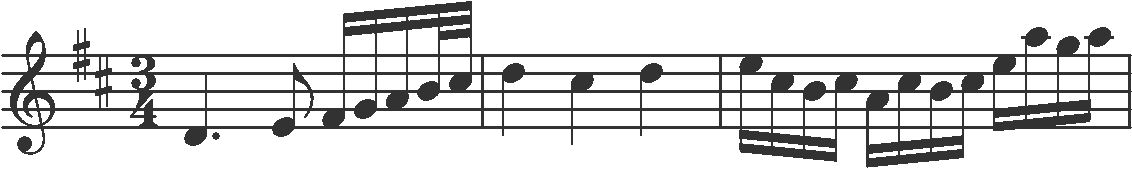

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img_path = '/content/primus/package_ab/212001944-1_2_1/212001944-1_2_1.png'

img = cv2.imread(img_path)
cv2_imshow(img)

In [ ]:
!python predict_single.py -image /content/primus/package_ab/212001944-1_2_1/212001944-1_2_1.png -out /content/ -model /content/trained_model/trained_semantic_model-7500.meta -vocabulary /content/Data/vocabulary_semantic.txt



2022-01-12 14:35:48.687211: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-01-12 14:35:48.687611: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55cb683a4a00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-12 14:35:48.687657: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-01-12 14:35:48.694313: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-12 14:35:48.963583: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 14:35:48.964721: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55cb683a4f40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-01

# Format semantic encoding to audio format

In [ ]:
shutil.copytree('/content/drive/MyDrive/Comvis 20211/end_to_end/primus_conversor', '/content/primus_conversor') 

'/content/primus_conversor'

In [ ]:
%cd /content/primus_conversor/

/content/primus_conversor


In [ ]:
!bash semantic_conversor.sh /content/212001944-1_2_1.semantic output.mid

Jan 12, 2022 2:37:24 PM es.ua.dlsi.im3.omr.encoding.semantic.SemanticImporter importSong
INFO: Parsing /content/212001944-1_2_1.semantic


In [ ]:
!pip install pydub
!pip install mido

In [ ]:
!python midi_to_wav.py -i output.mid -o output.wav

In [ ]:
import IPython.display as ipd
ipd.Audio('output.wav') # load a local WAV file

# Evaluate model

In [ ]:
%cd /content/drive/MyDrive/Comvis\ 20211/end_to_end

/content/drive/MyDrive/Comvis 20211/end_to_end


In [ ]:
!mkdir /content/eval_set

In [ ]:
!python build_evaluation_set.py -primus /content/primus/package_ab -output /content/eval_set -samples_count 300

In [ ]:
!python predict_multi.py -evaluate /content/eval_set -model /content/trained_model/trained_semantic_model-7500.meta -vocabulary /content/Data/vocabulary_semantic.txt



2022-01-12 15:40:47.745835: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-01-12 15:40:47.746278: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56307ed6aa00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-12 15:40:47.746318: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-01-12 15:40:47.752759: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-01-12 15:40:48.030785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 15:40:48.031778: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x56307ed6af40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-01

In [ ]:
!python evaluate_result.py -evaluate /content/eval_set

100% 300/300 [00:00<00:00, 9273.35it/s]
Evaluation result: Model return the symbol error rate of 95.91, evaluated on 300 samples
